# ssofreeze

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 1463
download_chandra_obsid 1463 evt2,asol,eph1
mv -fv 1463/primary/*fits.gz .
gunzip -f *fits.gz


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  asol     fits        6 Mb  ####################          < 1 s  61827.4 kb/s
  evt2     fits        5 Mb  ####################          < 1 s  49284.6 kb/s
  eph1     fits      301 Kb  ####################          < 1 s  9995.4 kb/s
  eph1     fits      293 Kb  ####################          < 1 s  13328.2 kb/s
  eph1     fits      272 Kb  ####################          < 1 s  6734.0 kb/s
  eph1     fits       41 Kb  ####################          < 1 s  2635.1 kb/s
  eph1     fits       28 Kb  ####################          < 1 s  1784.4 kb/s
  eph1     fits       11 Kb  ####################          < 1 s  84.6 kb/s

      Total download size for ObsId 1463 = 12 Mb
      Total download time for ObsId 1463 = < 1 s

'1463/primary/acisf01463N006_evt2.fits.gz' -> './acisf01463N006_evt2.fits.gz'
'1463/primary/jupiterf059875200N001_eph1

In [3]:
ls -1 *eph1.fits

jupiterf059875200N001_eph1.fits
jupiterf059875200N002_eph1.fits
orbitf059443264N002_eph1.fits


In [4]:
dmkeypar acisf01463N006_evt2.fits TSTART echo+

59968797.485557


In [5]:
\ls pcadf*asol1.fits > pcad_asol1.lis
cat pcad_asol1.lis

pcadf059968984N004_asol1.fits


In [6]:
pset sso_freeze infile=acisf01463N006_evt2.fits
pset sso_freeze scephemfile=orbitf059443264N002_eph1.fits
pset sso_freeze ssoephemfile=jupiterf059875200N002_eph1.fits
pset sso_freeze asolfile=@pcad_asol1.lis
pset sso_freeze ocsolfile=1463_oc_asol1.fits
pset sso_freeze outfile=frozenjupiter.fits
sso_freeze mode=h clob+


[1] 33684
[1]+  Done                    ds9 -scale log frozenjupiter.fits "frozenjupiter.fits[bin=ocx,ocy]" -saveimage png ds9_01.png


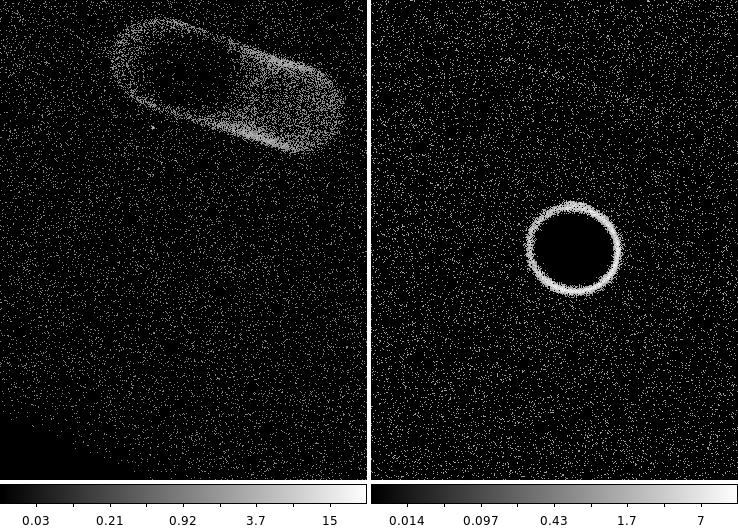

In [7]:
ds9 -scale log frozenjupiter.fits "frozenjupiter.fits[bin=ocx,ocy]" \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

# Cleanup

In [8]:
/bin/rm -rf 1463
/bin/rm -f acisf* pcadf* *eph1.fits 
